# Q.4.

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer

10


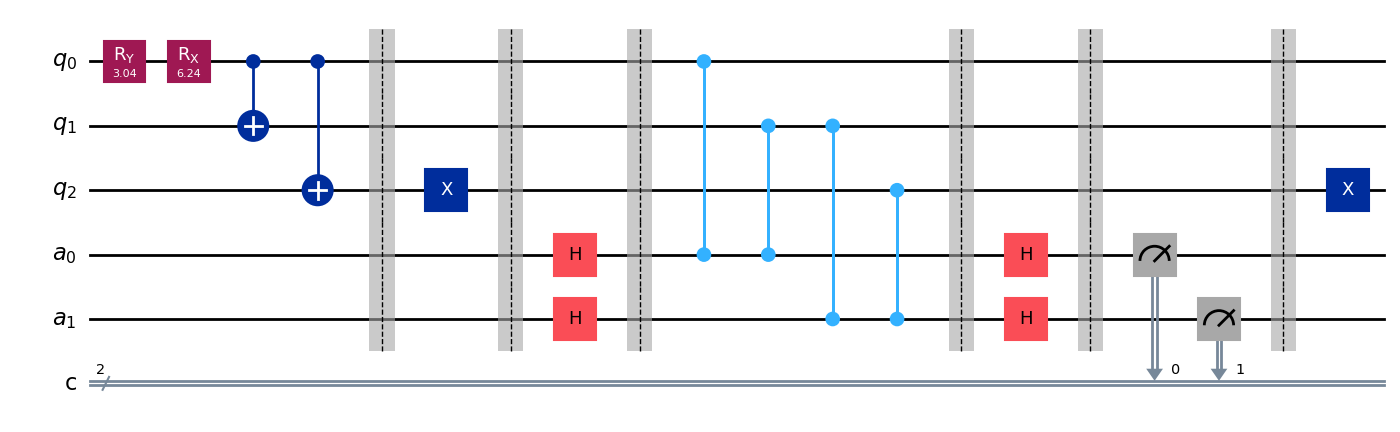

In [5]:
#creating 3 qubits, 2 ancilla qubits and 2 classical qubits.
qr = QuantumRegister(3, 'q')
aq = QuantumRegister(2, 'a')
cr = ClassicalRegister(2, 'c')  
qc = QuantumCircuit(qr, aq, cr)
#creating a random qubit state a|0>+b|1>
qc.ry(np.random.rand()*2*np.pi,qr[0]);
qc.rx(np.random.rand()*2*np.pi,qr[0]);

# Entangling qr[0] with qr[1] and qr[2]
qc.cx(qr[0], qr[1])
qc.cx(qr[0], qr[2])
qc.barrier()
#simulating single qubit error
a=np.random.randint(0,4)
if a==0:
    qc.x(qr[0])
if a==1:
    qc.x(qr[1])
if a==2:
    qc.x(qr[2])
qc.barrier()
#making stabilizer measurements through ancilla qubits 
qc.h(aq[0])
qc.h(aq[1])
qc.barrier()
qc.cz(aq[0],qr[0])
qc.cz(aq[0],qr[1])
qc.cz(aq[1],qr[1])
qc.cz(aq[1],qr[2])
qc.barrier()
qc.h(aq[0])
qc.h(aq[1])
qc.barrier()
# Measure the qubit and store the result in the classical bit
qc.measure(aq[0], cr[0])
qc.measure(aq[1],cr[1])
qc.barrier()
# Transpile the circuit for the simulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)

# Execute the transpiled circuit on the simulator
result = simulator.run(compiled_circuit, shots=1).result()

# Get the measurement result
counts = result.get_counts(compiled_circuit)
state = list(counts.keys())[0]  # Get the measured state (0 or 1)
print(state)

#defining an error correction function 
def error_correction(qc,state):
    if state=='00':
        pass
    elif state=='01':
        qc.x(qr[0])
    elif state=='10':
        qc.x(qr[2])
    elif state=='11':
        qc.x(qr[1])
error_correction(qc,state)
qc.draw('mpl')
